# What is good food?

In [60]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df_food = pd.read_csv('nutrition.csv')
df_food

FDC_ID  ... Vitamin C
0     167512  ...       NaN
1     167513  ...    0.1 mg
2     167514  ...       NaN
3     167515  ...       NaN
4     167516  ...    0.0 mg
...      ...  ...       ...
7788  175300  ...    0.0 mg
7789  175301  ...    0.0 mg
7790  175302  ...    0.0 mg
7791  175303  ...    0.0 mg
7792  175304  ...    0.0 mg

[7793 rows x 12 columns]

# Executive Summary

My friend and I have gotten into a debate about nutrition. My friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). I claim that a balanced diet should contain all nutrients but should be low in calories. Both of us quickly realized that most of what we know about nutrition comes from mainstream and social media. Being the data scientist that I am, I offered to look at the data myself to answer a few key questions.
1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. A gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of my linear model to see what could be the hidden sources of calories in food.

## ðŸ’¾ The data

I have sourced nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

# Data Cleaning
### To ensure the integrity of the data, we will perform the following steps:

1. Remove duplicates
2. Impute missing values
3. Normalize values

Let's start by removing duplicates.

### Remove duplicates

In [61]:
print('Length before dropping duplicates:',df_food.shape[0])
df_food.drop_duplicates(inplace=True)
print('Length after dropping duplicates:',df_food.shape[0])

Length before dropping duplicates: 7793
Length after dropping duplicates: 7793


There are no duplicates in this table.

### Normalize Values
First, we'll check the types of data in the data frame. Numerical values are objects so they'll need to be changed to floats. We'll also need to remove units for easier analysis.

In [62]:
df_food.dtypes

FDC_ID           int64
Item            object
Category        object
Calories        object
Protein         object
Carbohydrate    object
Total fat       object
Cholesterol     object
Fiber           object
Water           object
Alcohol         object
Vitamin C       object
dtype: object

In [63]:
#Column FDC_ID is irrelevent so it will be dropped
df_food.drop('FDC_ID',axis=1,inplace=True)

#Replace null values with 0
df_food.fillna('0', inplace=True)

#Convert everything to strings to strip units
df_food = df_food.convert_dtypes()

#Strip the units
for i in df_food.index:
    #Remove 'kcal' from Calories
    df_food['Calories'][i] = df_food['Calories'][i].strip('kcal')

    #Remove 'g' from Protein
    df_food['Protein'][i] = df_food['Protein'][i].strip('g')

    #Remove 'g' from Carbohydrate
    df_food['Carbohydrate'][i] = df_food['Carbohydrate'][i].strip('g')    

    #Remove 'g' from Total fat
    df_food['Total fat'][i] = df_food['Total fat'][i].strip('g') 

    #Remove 'mg' from Cholesterol
    df_food['Cholesterol'][i] = df_food['Cholesterol'][i].strip('mg') 
    
    #Remove 'g' from Fiber
    df_food['Fiber'][i] = df_food['Fiber'][i].strip('g') 

    #Remove 'g' from Water
    df_food['Water'][i] = df_food['Water'][i].strip('g') 
    
    #Remove 'g' from Alcohol
    df_food['Alcohol'][i] = df_food['Alcohol'][i].strip('g')
    
    #Remove 'mg' from Vitamin C
    df_food['Vitamin C'][i] = df_food['Vitamin C'][i].strip('mg')

#Finally, convert columns to analysis friendly dtypes
df_food[['Calories','Protein','Carbohydrate','Total fat','Cholesterol','Fiber','Water','Alcohol','Vitamin C']] = df_food[['Calories','Protein','Carbohydrate','Total fat','Cholesterol','Fiber','Water','Alcohol','Vitamin C']].astype('float64')
df_food.dtypes

Item             string
Category         string
Calories        float64
Protein         float64
Carbohydrate    float64
Total fat       float64
Cholesterol     float64
Fiber           float64
Water           float64
Alcohol         float64
Vitamin C       float64
dtype: object

# Analysis
Now that the data is clean, we can begin our Analysis.

### 1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
We'll start by organizing all the fruits and their respective vitamin C values into their own dataframe.

In [64]:
df_food['Category'].unique()

<StringArray>
[                     'Baked Products',                              'Snacks',
                              'Sweets',   'Vegetables and Vegetable Products',
 'American Indian/Alaska Native Foods',                    'Restaurant Foods',
                           'Beverages',                       'Fats and Oils',
         'Sausages and Luncheon Meats',              'Dairy and Egg Products',
                          'Baby Foods',                    'Poultry Products',
                       'Pork Products',                   'Breakfast Cereals',
         'Legumes and Legume Products',      'Finfish and Shellfish Products',
             'Fruits and Fruit Juices',             'Cereal Grains and Pasta',
               'Nut and Seed Products',                       'Beef Products',
     'Meals, Entrees, and Side Dishes',                          'Fast Foods',
                    'Spices and Herbs',          'Soups, Sauces, and Gravies',
       'Lamb, Veal, and Game Products'

Here we can see all of the unique values in the Category column so we can filter the dataframe by 'Fruits and Fruit Juices' to create the df_fruit dataframe. Finally we'll take a look at the top 10 fruits by Vitamin C content.

In [65]:
df_fruit = df_food[df_food['Category']=='Fruits and Fruit Juices']
df_fruit = df_fruit[['Item','Vitamin C']].reset_index(drop=True)

In [66]:
df_fruit.sort_values(by='Vitamin C',ascending=False,inplace=True)
df_fruit.head(10)

Item  Vitamin C
228                 Acerola, (west indian cherry), raw     1677.6
229                                 Acerola juice, raw     1600.0
293                                Guavas, common, raw      228.3
67                       Jujube, Chinese, fresh, dried      217.6
134                                     Litchis, dried      183.0
330                      Currants, european black, raw      181.0
60                                       Baobab powder      173.2
126                     Kiwifruit, ZESPRI SunGold, raw      161.3
353                                Guava sauce, cooked      146.4
198  Orange juice, frozen concentrate, unsweetened,...      144.8

The fruit with the highest Vitamin C content is the Acerola Cherry with over 1600 mg of Vitamin C. At first I thought this was a mistake and needed to verify the data. According to the USDA, Acerola Cherries do in fact contain 1680 mg of Vitamin C in a 100g serving! We can also see that peppers, tea, chives, and spices also have a significantly high amount of Vitamin C.

In [67]:
df_food[['Item','Vitamin C']].sort_values(by='Vitamin C', ascending=False).head(10)

Item  Vitamin C
3449  Babyfood, GERBER, 2nd Foods, apple, carrot and...     2732.0
2140  Beverages, fruit-flavored drink, powder, with ...     2400.0
2316  Beverages, Orange-flavor drink, breakfast type...     2400.0
1454                  Peppers, sweet, red, freeze-dried     1900.0
5220                 Acerola, (west indian cherry), raw     1677.6
5221                                 Acerola juice, raw     1600.0
2373  Beverages, tea, green, instant, decaffeinated,...     1342.3
1619                               Chives, freeze-dried      660.0
7016                      Spices, coriander leaf, dried      566.7
2139  Beverages, fruit-flavored drink, dry powdered ...      560.0

### 2. Describe the relationship between the calories and water content of a food item.
Here we can see a negative correlation between calories and water content. This makes sense because foods with higher water content are likely to be fruits and vegetables which have lower calories.

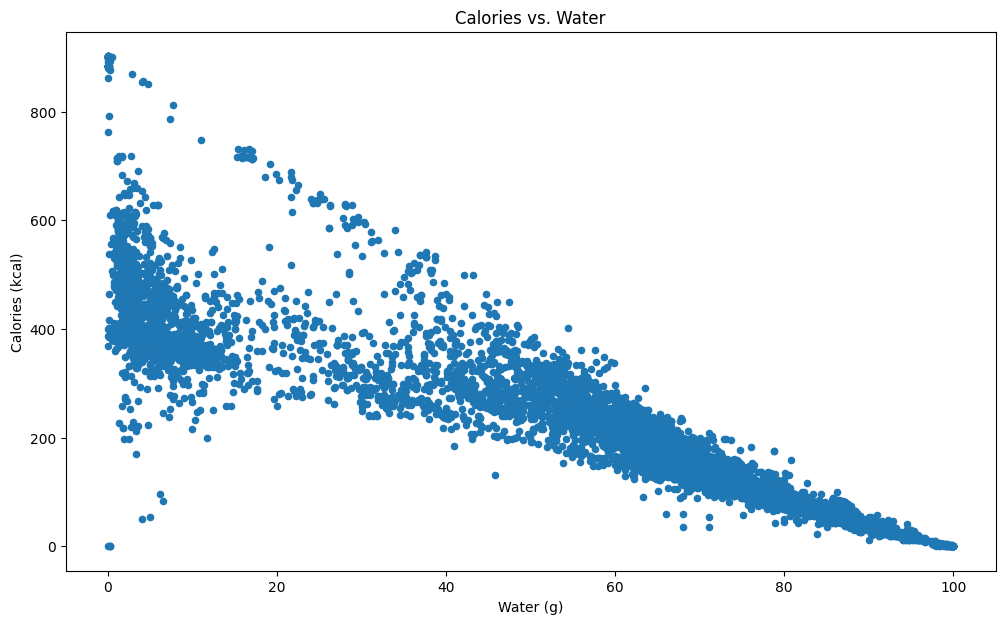

In [68]:
df_food.plot(kind='scatter',x='Water',y='Calories',figsize=(12,7))
plt.xlabel('Water (g)')
plt.ylabel('Calories (kcal)')
plt.title('Calories vs. Water')
plt.show()

### 3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

Let's start by taking a look at the average nutritional content of zero-carb foods and compare it to foods with carbs.

#### Foods with no carbs

In [69]:
#Foods with no carbs
no_carb = df_food[df_food['Carbohydrate']==0]
avg_nc = no_carb.mean()
avg_nc = avg_nc.to_frame()
avg_nc.reset_index(inplace=True)
avg_nc.rename(columns={'index':'Property',0:'Amount'},inplace=True)
avg_nc

Property      Amount
0      Calories  233.555012
1       Protein   22.289935
2  Carbohydrate    0.000000
3     Total fat   15.582214
4   Cholesterol   93.452760
5         Fiber    0.000000
6         Water   61.081712
7       Alcohol    0.105613
8     Vitamin C    0.669411

#### Foods with carbs

In [70]:
#Foods with carbs
carbs = df_food[df_food['Carbohydrate']!=0]
avg_c = carbs.mean()
avg_c = avg_c.to_frame()
avg_c.reset_index(inplace=True)
avg_c.rename(columns={'index':'Property',0:'Amount'},inplace=True)
avg_c

Property      Amount
0      Calories  215.210256
1       Protein    8.008884
2  Carbohydrate   26.968587
3     Total fat    8.836752
4   Cholesterol   23.565517
5         Fiber    2.530681
6         Water   54.124863
7       Alcohol    0.136021
8     Vitamin C   11.384191

Next, we'll plot these values on a bar chart. Since Vitamin C and Cholesterol are measured in mg, we'll put those values on their own charts. This makes it easier to see the comparison in values.

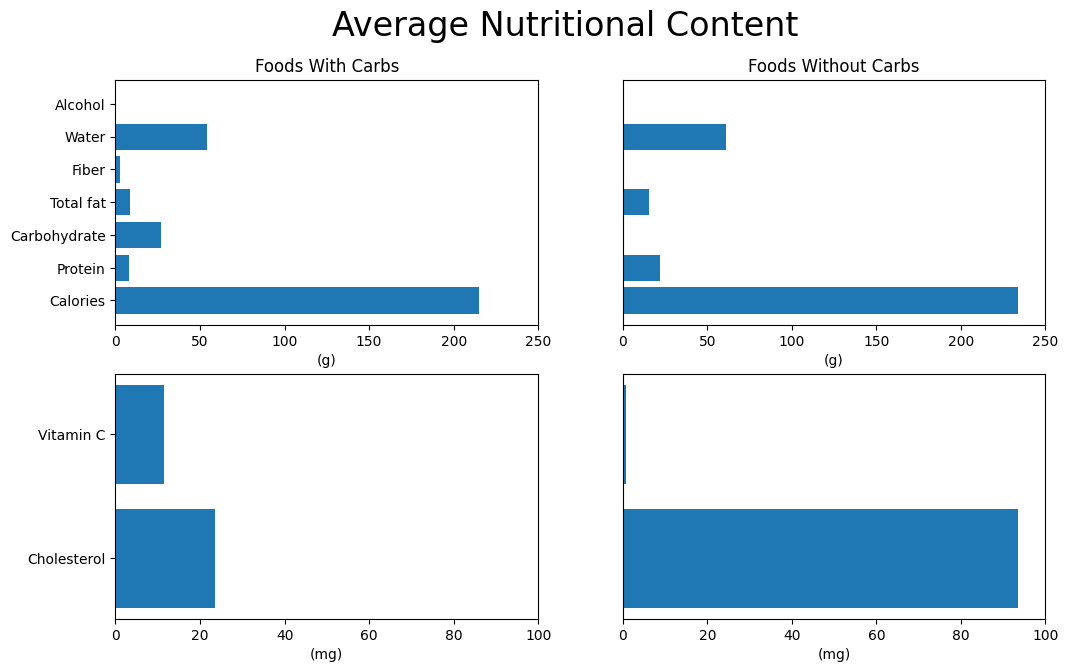

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12,7))

df = avg_c.drop([4,8])
ax[0,0].barh(df['Property'],df['Amount'])
ax[0,0].set_title('Foods With Carbs')
ax[0,0].set_xlabel('(g)')
ax[0,0].set_xlim(xmax=250)

df = avg_c.drop([0,1,2,3,5,6,7])
ax[1,0].barh(df['Property'],df['Amount'])
ax[1,0].set_xlabel('(mg)')
ax[1,0].set_xlim(xmax=100)

df = avg_nc.drop([4,8])
ax[0,1].barh(df['Property'],df['Amount'])
ax[0,1].set_title('Foods Without Carbs')
ax[0,1].set_xlabel('(g)')
ax[0,1].set_xlim(xmax=250)
ax[0,1].set_yticks([])

df = avg_nc.drop([0,1,2,3,5,6,7])
ax[1,1].barh(df['Property'],df['Amount'])
ax[1,1].set_xlabel('(mg)')
ax[1,1].set_xlim(xmax=100)
ax[1,1].set_yticks([])

fig.suptitle('Average Nutritional Content',fontsize=24)
#fig.legend(labels,loc='upper left')
fig.show()

#### Zero-Carb Diet
Here we can clearly see that foods without carbs do have less calories, however there are some potential drawbacks to this diet. Foods without carbs also have a higher amount of fats and cholesterol while also having no Vitamin C. A high fat diet can lead to cardiovascular disease. Not consuming Vitamin C can also lead to complications such as feeling tired and weak, aching legs and arms, swollen and bleeding gums, and anemia.

Next we'll take a look at a high protein diet with a similar approach.

The df_food dataframe is first split by foods with no protein and foods with protein.

#### Foods with no protein

In [72]:
#Foods with no protein
no_protein = df_food[df_food['Protein']==0]
avg_np = no_protein.mean()
avg_np = avg_np.to_frame()
avg_np.reset_index(inplace=True)
avg_np.rename(columns={'index':'Property',0:'Amount'},inplace=True)
avg_np

Property      Amount
0      Calories  370.789790
1       Protein    0.000000
2  Carbohydrate   18.601081
3     Total fat   32.955345
4   Cholesterol   14.609610
5         Fiber    0.073574
6         Water   45.735976
7       Alcohol    1.090991
8     Vitamin C   11.045946

#### Foods with protein

In [73]:
#Foods with protein
protein = df_food[df_food['Protein']!=0]
avg_p = protein.mean()
avg_p = avg_p.to_frame()
avg_p.reset_index(inplace=True)
avg_p.rename(columns={'index':'Property',0:'Amount'},inplace=True)
avg_p

Property      Amount
0      Calories  213.523005
1       Protein   12.459265
2  Carbohydrate   19.613029
3     Total fat    9.693361
4   Cholesterol   43.994638
5         Fiber    1.915080
6         Water   56.493126
7       Alcohol    0.084678
8     Vitamin C    8.328485

Next, we'll plot these values on a bar chart. Again, Vitamin C and Cholesterol are plotted separately.

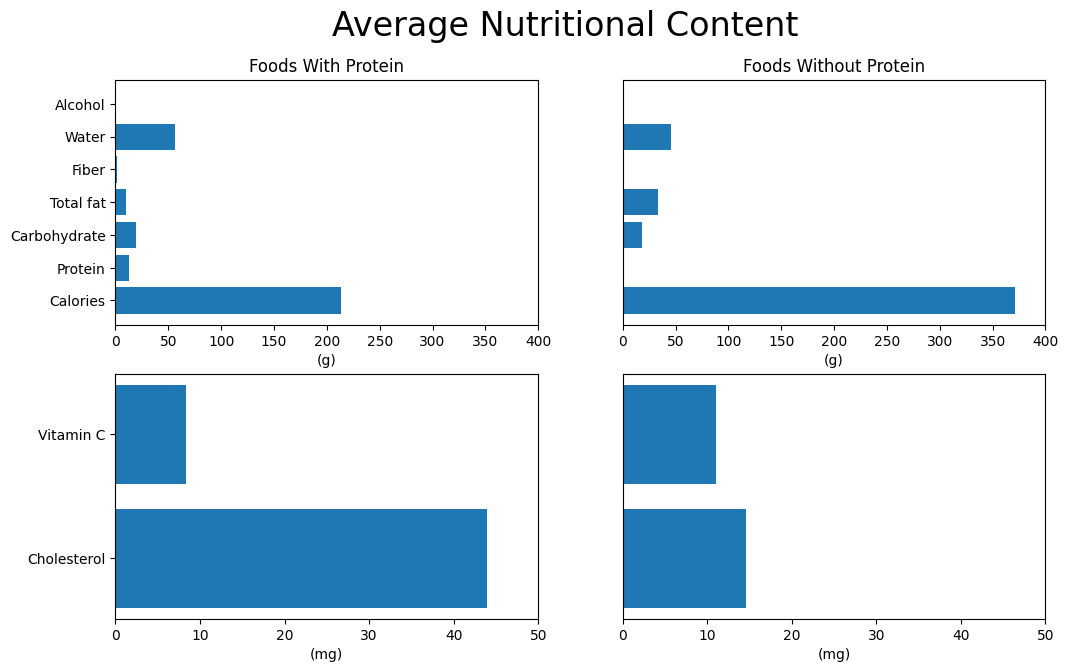

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(12,7))

df = avg_p.drop([4,8])
ax[0,0].barh(df['Property'],df['Amount'])
ax[0,0].set_title('Foods With Protein')
ax[0,0].set_xlabel('(g)')
ax[0,0].set_xlim(xmax=400)

df = avg_p.drop([0,1,2,3,5,6,7])
ax[1,0].barh(df['Property'],df['Amount'])
ax[1,0].set_xlabel('(mg)')
ax[1,0].set_xlim(xmax=50)

df = avg_np.drop([4,8])
ax[0,1].barh(df['Property'],df['Amount'])
ax[0,1].set_title('Foods Without Protein')
ax[0,1].set_xlabel('(g)')
ax[0,1].set_xlim(xmax=400)
ax[0,1].set_yticks([])

df = avg_np.drop([0,1,2,3,5,6,7])
ax[1,1].barh(df['Property'],df['Amount'])
ax[1,1].set_xlabel('(mg)')
ax[1,1].set_xlim(xmax=50)
ax[1,1].set_yticks([])

fig.suptitle('Average Nutritional Content',fontsize=24)
fig.show()

It is interesting to see here that foods with protein have less calories, less fat, and more cholesterol than foods without protein. Otherwise, there are not many major difference between foods with and without protein. However, people aiming to consume a high protein diet will likely gravitate towards meats as a high protein source. Let's take a look at the top 5 protein containing foods.

In [75]:
avg_p = protein[['Category','Protein']].groupby(by='Category').mean()
avg_p.sort_values('Protein',inplace=True,ascending=False)
avg_p.head()

Protein
Category                                 
Beef Products                   24.399046
Poultry Products                23.206475
Lamb, Veal, and Game Products   23.111379
Pork Products                   22.139077
Finfish and Shellfish Products  20.353258

#### Average nutritional content of the top 5 protein sources

In [77]:
meat = protein.groupby(by='Category').mean()
meat.sort_values('Protein',inplace=True,ascending=False)
meat = meat.head()
meat = meat.apply(np.mean,axis=0)
meat = meat.to_frame()
meat.reset_index(inplace=True)
meat.rename(columns={'index':'Property',0:'Amount'},inplace=True)
meat

Property      Amount
0      Calories  193.812663
1       Protein   22.641847
2  Carbohydrate    0.565007
3     Total fat   10.742311
4   Cholesterol  102.783843
5         Fiber    0.006703
6         Water   64.957964
7       Alcohol    0.000000
8     Vitamin C    1.033036

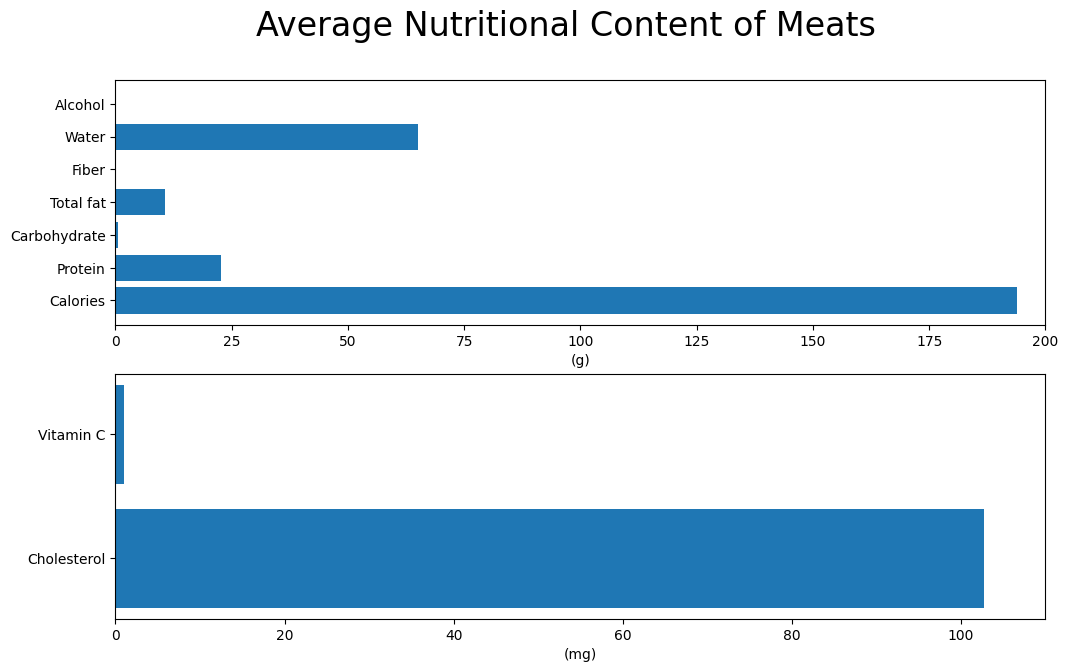

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(12,7))

df = meat.drop([4,8])
ax[0].barh(df['Property'],df['Amount'])
ax[0].set_xlabel('(g)')
ax[0].set_xlim(xmax=200)

df = meat.drop([0,1,2,3,5,6,7])
ax[1].barh(df['Property'],df['Amount'])
ax[1].set_xlabel('(mg)')
ax[1].set_xlim(xmax=110)

fig.suptitle('Average Nutritional Content of Meats',fontsize=24)
fig.show()

#### Very High Protein Diet
Now the picture is becoming more clear. From the bar chart we can see that meat products, while still maintaining a relatively low calorie count, are higher in cholesterol and fat and have little to no Vitamin C or Fiber. Here we are presented with the same issues as the zero-carb diet. High cholesterol intake is linked to cardiovascular disease and low Vitamin C intake can result in scurvy. In addition, a low fiber intake is assocated with constipation, irritable bowel syndrome (IBS), diverticulitis, heart disease and some cancers.

### 4. According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

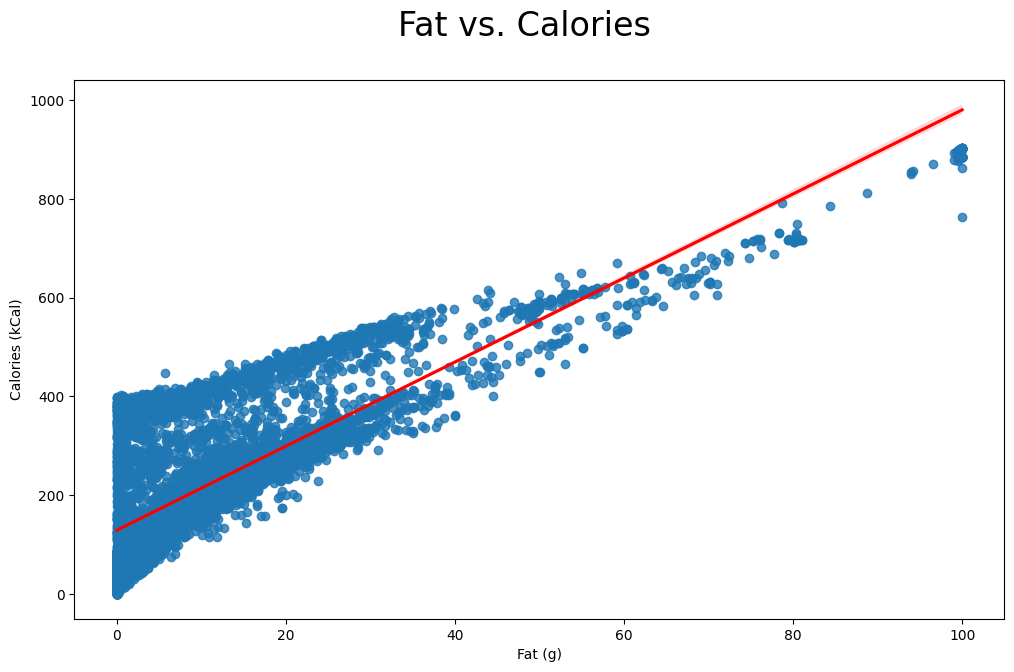

In [79]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(12, 7))

lr_fat = LinearRegression()
x = df_food[['Total fat']]
y = df_food[['Calories']]
lr_fat.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Fat (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Fat vs. Calories', fontsize=24)
fig.show()

In [80]:
print('kCal/g of Fat:',round(lr_fat.coef_[0][0],2))

kCal/g of Fat: 8.5


kCal/g of Fat: 8.5

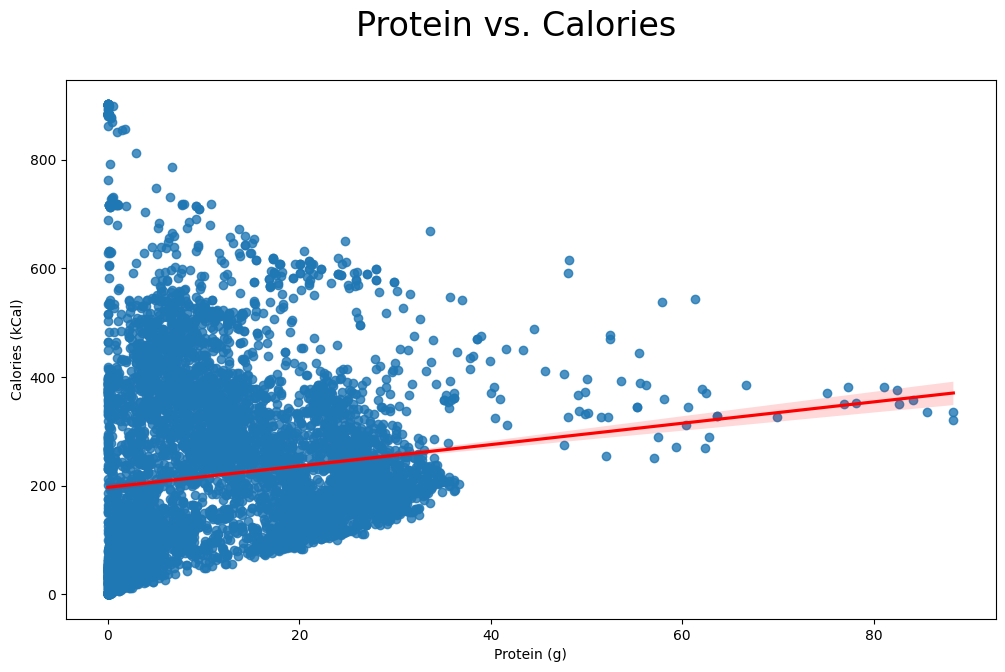

In [81]:
fig, ax = plt.subplots(figsize=(12, 7))

lr_protein = LinearRegression()
x = df_food[['Protein']]
y = df_food[['Calories']]
lr_protein.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Protein (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Protein vs. Calories', fontsize=24)
fig.show()

In [82]:
print('kCal/g of Protein:',round(lr_protein.coef_[0][0],2))

kCal/g of Protein: 1.97


kCal/g of Protein: 1.97

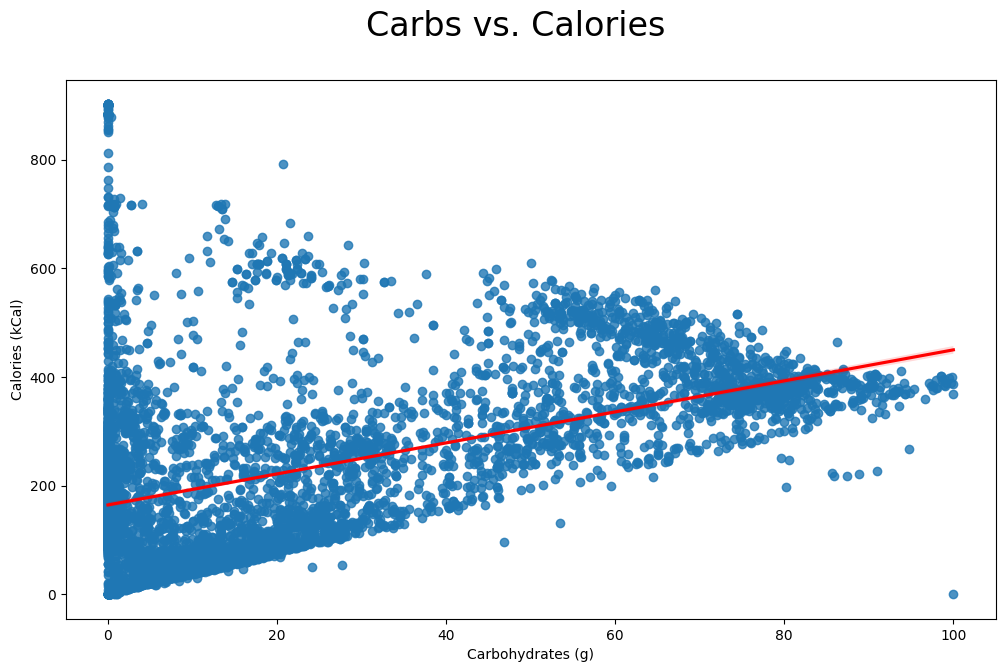

In [83]:
fig, ax = plt.subplots(figsize=(12, 7))

lr_carbs = LinearRegression()
x = df_food[['Carbohydrate']]
y = df_food[['Calories']]
lr_carbs.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Carbohydrates (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Carbs vs. Calories', fontsize=24)
fig.show()

In [84]:
print('kCal/g of Carbs:',round(lr_carbs.coef_[0][0],2))

kCal/g of Carbs: 2.85


kCal/g of Carbs: 2.85

### 5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

According to the Cleveland Clinic website, a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. We can see quite a bit of variation from this using the data from the USDA. Our data shows that Carbohydrates have 2.85 kCal/g, Protein has 1.97 kCal/g, and Fat has 8.5 kCal/g. Let's start by taking a look at the correlation between the nutritional properties of all foods.

In [85]:
cor = df_food.corr().round(3)
cor

Calories  Protein  Carbohydrate  ...  Water  Alcohol  Vitamin C
Calories         1.000    0.126         0.435  ... -0.895   -0.019     -0.039
Protein          0.126    1.000        -0.309  ... -0.131   -0.084     -0.075
Carbohydrate     0.435   -0.309         1.000  ... -0.734   -0.037      0.071
Total fat        0.826    0.056        -0.075  ... -0.509   -0.049     -0.057
Cholesterol      0.026    0.281        -0.215  ...  0.041   -0.026     -0.030
Fiber            0.188   -0.079         0.441  ... -0.366   -0.034      0.057
Water           -0.895   -0.131        -0.734  ...  1.000    0.039     -0.007
Alcohol         -0.019   -0.084        -0.037  ...  0.039    1.000     -0.009
Vitamin C       -0.039   -0.075         0.071  ... -0.007   -0.009      1.000

[9 rows x 9 columns]

In [86]:
print('Correlation between Total Fat and Calories:',cor['Calories'].loc['Total fat'])
print('Regression Coefficient for Fat vs. Calories:',round(lr_fat.coef_[0][0],3),'\n')

print('Correlation between Carbohydrates and Calories:',cor['Calories'].loc['Carbohydrate'])
print('Regression Coefficient for Carbs vs. Calories:',round(lr_carbs.coef_[0][0],3),'\n')

print('Correlation between Protein and Calories:',cor['Calories'].loc['Protein'])
print('Regression Coefficient for Protein vs. Calories:',round(lr_protein.coef_[0][0],3))

Correlation between Total Fat and Calories: 0.826
Regression Coefficient for Fat vs. Calories: 8.504 

Correlation between Carbohydrates and Calories: 0.435
Regression Coefficient for Carbs vs. Calories: 2.855 

Correlation between Protein and Calories: 0.126
Regression Coefficient for Protein vs. Calories: 1.966


Correlation between Total Fat and Calories: 0.826\
Regression Coefficient for Fat vs. Calories: 8.504

Correlation between Carbohydrates and Calories: 0.435\
Regression Coefficient for Carbs vs. Calories: 2.855

Correlation between Protein and Calories: 0.126\
Regression Coefficient for Protein vs. Calories: 1.966

It's interesting to note that the further we get away from Cleveland Clinic's numbers, the correlation of Calories to that nutritional value also decreases. Since the values from the USDA data is lower than the expected values, I also find it intersting to note that the correlation of calories and water content presents the strongest negative correlation at -0.895. Let's run a linear regression model on Water vs. Calories.

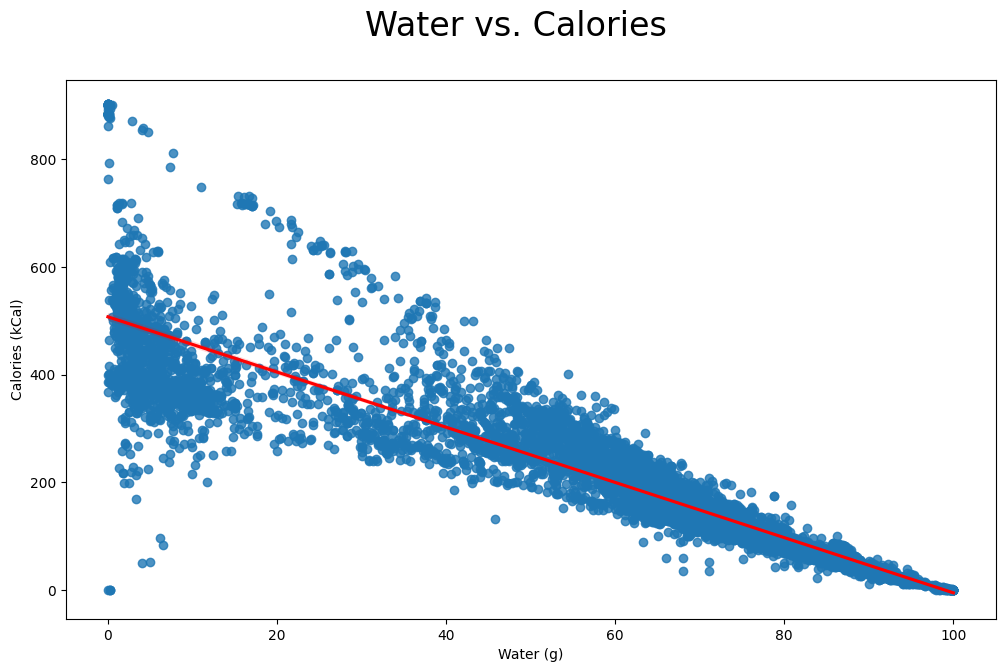

In [87]:
fig, ax = plt.subplots(figsize=(12, 7))

lr_water = LinearRegression()
x = df_food[['Water']]
y = df_food[['Calories']]
lr_water.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Water (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Water vs. Calories', fontsize=24)
fig.show()

In [88]:
print('Correlation between Water and Calories:',cor['Calories'].loc['Water'])
print('Regression Coefficient for Water vs. Calories:',round(lr_water.coef_[0][0],3))

Correlation between Water and Calories: -0.895
Regression Coefficient for Water vs. Calories: -5.124


This seems to imply that foods with more water have fewer calories. Perhaps we should take a look at the distribution of the food categories. If the categories of foods are disproportionate, it could result in errors in our linear model.

In [89]:
counts = df_food['Category'].value_counts().to_frame()
counts.reset_index(inplace=True)
counts.rename(columns={'index':'Category','Category':'Count'},inplace=True)
counts

Category  Count
0                         Beef Products    954
1     Vegetables and Vegetable Products    814
2                        Baked Products    517
3         Lamb, Veal, and Game Products    464
4                      Poultry Products    383
5                             Beverages    366
6                                Sweets    358
7               Fruits and Fruit Juices    355
8                            Baby Foods    345
9                         Pork Products    336
10                           Fast Foods    312
11               Dairy and Egg Products    291
12          Legumes and Legume Products    290
13       Finfish and Shellfish Products    264
14           Soups, Sauces, and Gravies    254
15                        Fats and Oils    216
16                    Breakfast Cereals    195
17              Cereal Grains and Pasta    181
18                               Snacks    176
19          Sausages and Luncheon Meats    167
20  American Indian/Alaska Native Foods    165
21                Nut and Seed Products    137
22                     Restaurant Foods    109
23      Meals, Entrees, and Side Dishes     81
24                     Spices and Herbs     63

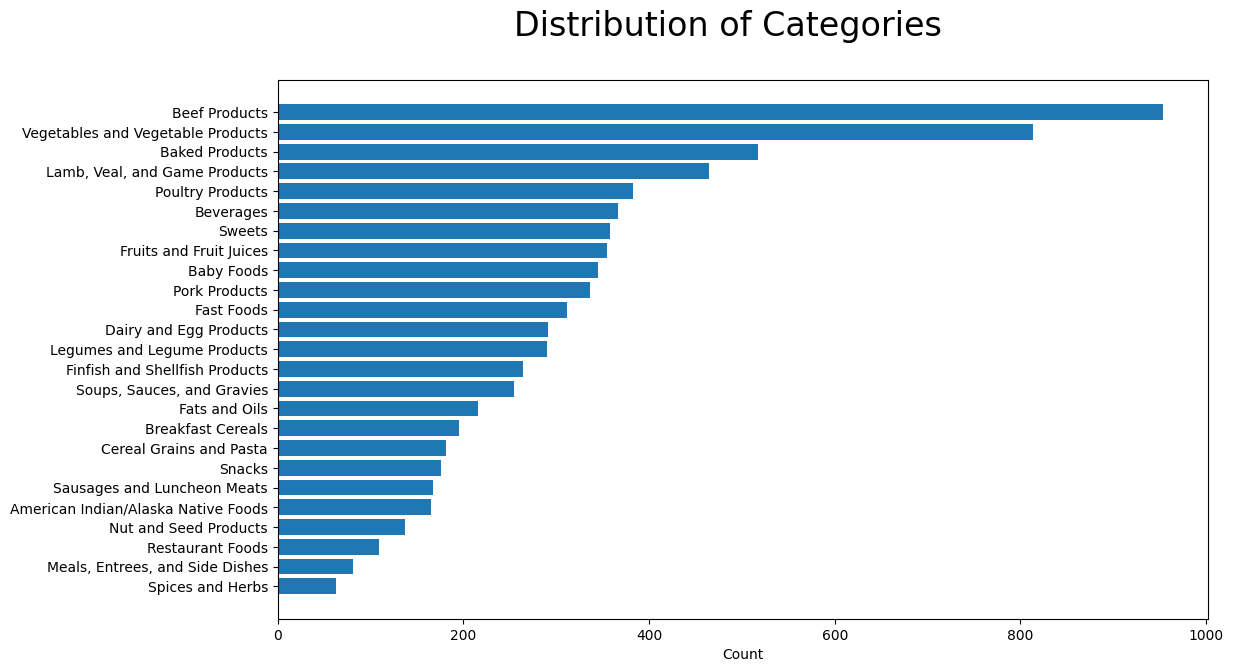

In [140]:
fig, ax = plt.subplots(figsize=(12,7))

counts.sort_values(by='Count',ascending=True,inplace=True)

ax.barh(counts['Category'],counts['Count'])
ax.set_xlabel('Count')

fig.suptitle('Distribution of Categories', fontsize=24)
fig.show()

In [91]:
beef_pct=round(df_food[df_food['Category']=='Beef Products'].shape[0]/df_food.shape[0],4)
veg_pct=round(df_food[df_food['Category']=='Vegetables and Vegetable Products'].shape[0]/df_food.shape[0],4)
print('Beef Products:','{:.2%}'.format(beef_pct))
print('Vegetables and Vegetable Products:','{:.2%}'.format(veg_pct))

Beef Products: 12.24%
Vegetables and Vegetable Products: 10.45%


Beef Products: 12.24%\
Vegetables and Vegetable Products: 10.45%

In [136]:
df_food.groupby('Category').mean().sort_values(by='Water',ascending=False)['Water'].head(3).to_frame()

Water
Category                                    
Vegetables and Vegetable Products  82.425405
Fruits and Fruit Juices            76.371070
Beverages                          76.178224

Here we can clearly see a disproportionate representation of categories in the data. With Vegetables having the highest water content and being the second highest category, we can predict that the disproportionatly high representation of vegetables is bringing down the number of calories per gram of carbohydrates in our linear model. We can explore this further by performing linear regression on the highest food category for Total Fat, Protein, and Carbohydrates.

#### Foods with the highest fat content

In [110]:
df_food.groupby('Category').mean().sort_values(by='Total fat',ascending=False)['Total fat'].head().to_frame()

Total fat
Category                                
Fats and Oils                  67.186852
Nut and Seed Products          38.980219
Sausages and Luncheon Meats    19.816347
Snacks                         17.061023
Lamb, Veal, and Game Products  13.119138

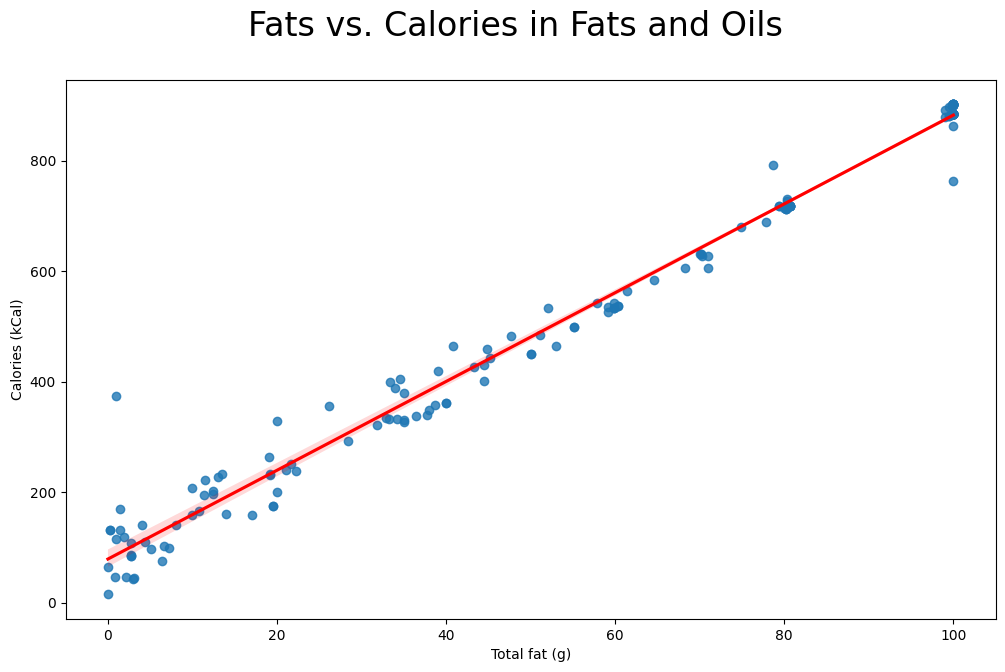

In [116]:
fig, ax = plt.subplots(figsize=(12, 7))

df = df_food[df_food['Category']=='Fats and Oils']

lr_fats = LinearRegression()
x = df[['Total fat']]
y = df[['Calories']]
lr_fats.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Total fat (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Fats vs. Calories in Fats and Oils', fontsize=24)
fig.show()

In [119]:
print('kCal/g of Fat in Fats and Oils:',round(lr_fats.coef_[0][0],2))

kCal/g of Fat in Fats and Oils: 8.04


kCal/g of Fat in Fats and Oils: 8.04

#### Foods with the highest protein content

In [106]:
df_food.groupby('Category').mean().sort_values(by='Protein',ascending=False)['Protein'].head().to_frame()

Protein
Category                                 
Beef Products                   24.399046
Poultry Products                23.206475
Lamb, Veal, and Game Products   23.111379
Pork Products                   22.139077
Finfish and Shellfish Products  20.353258

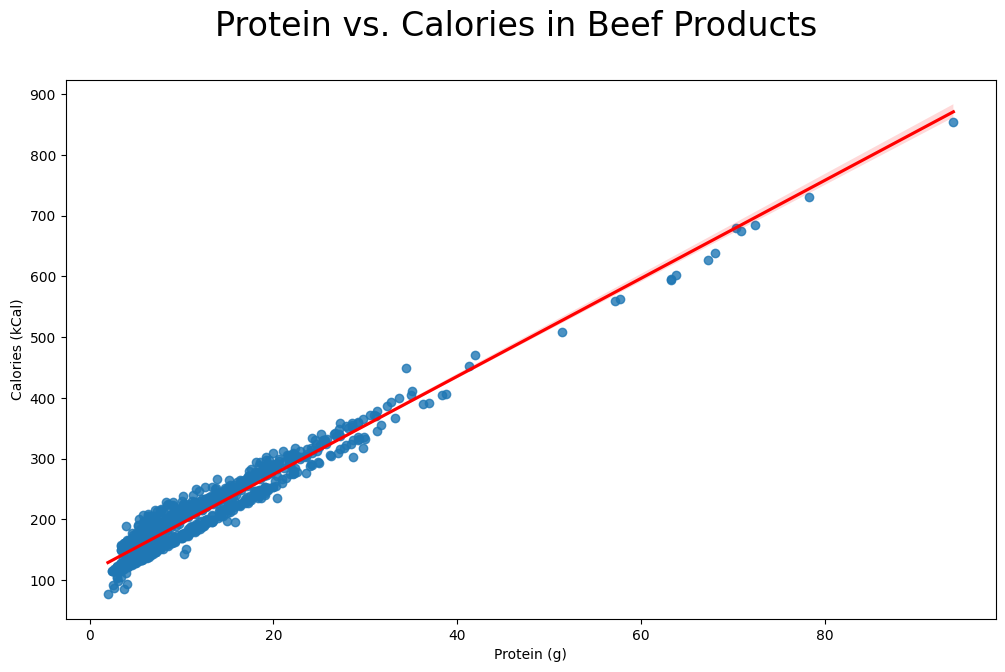

In [121]:
fig, ax = plt.subplots(figsize=(12, 7))

df = df_food[df_food['Category']=='Beef Products']

lr_protein = LinearRegression()
x = df[['Total fat']]
y = df[['Calories']]
lr_protein.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Protein (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Protein vs. Calories in Beef Products', fontsize=24)
fig.show()

In [123]:
print('kCal/g of Protein in Beef Products:',round(lr_protein.coef_[0][0],2))

kCal/g of Protein in Beef Products: 8.06


kCal/g of Protein in Beef Products: 8.06

#### Foods with the highest carbohydrate content

In [129]:
df_food.groupby('Category').mean().sort_values(by='Carbohydrate',ascending=False)['Carbohydrate'].head().to_frame()

Carbohydrate
Category                             
Breakfast Cereals           67.790051
Snacks                      64.492216
Cereal Grains and Pasta     58.473646
Sweets                      56.176676
Baked Products              56.065803

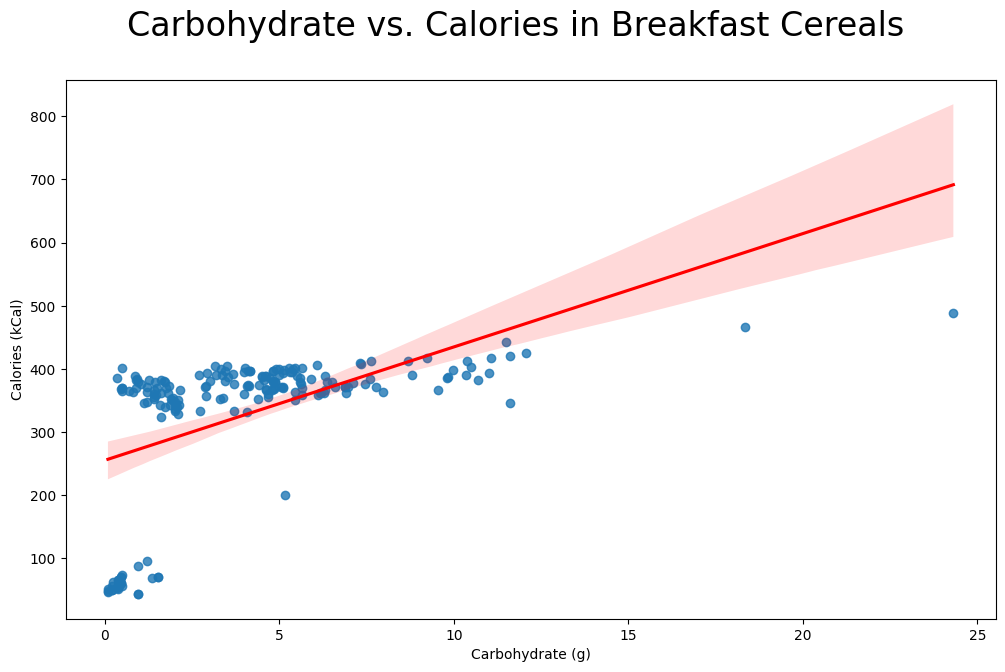

In [137]:
fig, ax = plt.subplots(figsize=(12, 7))

df = df_food[df_food['Category']=='Breakfast Cereals']

lr_carbs = LinearRegression()
x = df[['Total fat']]
y = df[['Calories']]
lr_carbs.fit(x,y)

sns.regplot(data=df_food,x=x,y=y,line_kws=dict(color="r"))
ax.set_xlabel('Carbohydrate (g)')
ax.set_ylabel('Calories (kCal)')
fig.suptitle('Carbohydrate vs. Calories in Breakfast Cereals', fontsize=24)
fig.show()

In [127]:
print('kCal/g of Protein in Breakfast Cereals:',round(lr_carbs.coef_[0][0],2))

kCal/g of Protein in Breakfast Cereals: 17.96


kCal/g of Protein in Breakfast Cereals: 17.96

In [134]:
print('Total Number of Fats and Oils:',df_food[df_food['Category']=='Fats and Oils'].shape[0])
print('Total Number of Beef Products:',df_food[df_food['Category']=='Beef Products'].shape[0])
print('Total Number of Breakfast Cereals:',df_food[df_food['Category']=='Breakfast Cereals'].shape[0])

Total Number of Fats and Oils: 216
Total Number of Beef Products: 954
Total Number of Breakfast Cereals: 195


Total Number of Fats and Oils: 216\
Total Number of Beef Products: 954\
Total Number of Breakfast Cereals: 195

## Conclusion

After running the linear regressions, the results have gotten even further away from the predicted values. However, this can be attributed to the fact that these food categories are poorly represented in the data. In Beef Products vs. Protein, we get the closest to the predicted value of 9 kCal/g because Beef Products have the highest representation in the data. With Breakfast Cereals being one of the lowest represented categories in the data, it deviates the furthest from the predicted value.